## Capstone Project - Spotify Song Analysis

Dataset do Kaagle de 2018.

O objetivo dessa análise é a aplicação de modelos de machine learning para ver se os atributos das músicas no dataset são suficientes para predizerem a popularidade das músicas.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("whitegrid")
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('song_data.csv')

In [3]:
info = pd.read_csv('song_info.csv')

### Análise Exploratória

In [4]:
data.head(2)

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0       0.00552         0.496   0.682          0.000029    8    0.0589   
1       0.01030         0.542   0.853          0.000000    3    0.1080   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370

In [5]:
info.head(2)

song_name  artist_name  \
0  Boulevard of Broken Dreams    Green Day   
1                  In The End  Linkin Park   

                          album_names          playlist  
0  Greatest Hits: God's Favorite Band  00s Rock Anthems  
1                       Hybrid Theory  00s Rock Anthems

In [6]:
data.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [7]:
info.dtypes

song_name      object
artist_name    object
album_names    object
playlist       object
dtype: object

In [8]:
print(len(data))
print(len(info))

18835
18835


In [9]:
info.columns

Index(['song_name', 'artist_name', 'album_names', 'playlist'], dtype='object')

Dropando as colunas que não serão utilizadas na análise

In [10]:
info.drop(columns=['album_names','playlist'], inplace=True)

Verificando se há valores repetidos

In [11]:
data.song_name.value_counts()

Better                                                                      21
FEFE (feat. Nicki Minaj & Murda Beatz)                                      19
MIA (feat. Drake)                                                           18
Taki Taki (with Selena Gomez, Ozuna & Cardi B)                              18
No Stylist                                                                  17
I Love It (& Lil Pump)                                                      16
Electricity (with Dua Lipa)                                                 16
Mo Bamba                                                                    16
Promises (with Sam Smith)                                                   16
Sunflower - Spider-Man: Into the Spider-Verse                               16
Lullaby                                                                     15
Fall                                                                        14
ZEZE (feat. Travis Scott & Offset)                  

In [12]:
#dropando valores duplicados
info.drop_duplicates(inplace=True)
data.drop_duplicates(inplace=True)

In [13]:
#quantidade de linhas nos datasets
print(len(data))
print(len(info))

14926
14006


In [14]:
data.song_name.value_counts()

Heaven                                                                 8
Fire                                                                   8
Gone                                                                   7
Alright                                                                7
Stay                                                                   7
You                                                                    7
Fall                                                                   7
Better                                                                 7
Breathe                                                                7
Dreamer                                                                6
Lullaby                                                                6
Alive                                                                  6
Beautiful                                                              6
Move                                               

In [15]:
#unificando os dois dataframes
df=pd.merge(info, data, how='left', left_index=True, right_index=True)

In [16]:
len(df)

14006

In [17]:
df.head(2)

song_name_x  artist_name                 song_name_y  \
0  Boulevard of Broken Dreams    Green Day  Boulevard of Broken Dreams   
1                  In The End  Linkin Park                  In The End   

   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333       0.00552         0.496   0.682   
1               66            216933       0.01030         0.542   0.853   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256               4          0.370

In [18]:
#dropando coluna duplicada
df.drop('song_name_y', axis=1, inplace=True)

In [19]:
df.rename(columns={'song_name_x':'song_name'}, inplace=True)

In [20]:
df.song_name.value_counts()

You                                      7
Stay                                     7
Gone                                     7
Fall                                     7
Fire                                     7
Heaven                                   6
Move                                     6
California                               6
Higher                                   6
Closer                                   5
Halo                                     5
Honest                                   5
Ghost                                    5
Lullaby                                  5
Trouble                                  5
Dreamer                                  5
Let It Go                                5
Waiting                                  5
Better                                   5
Alright                                  5
Change                                   5
Breathe                                  5
Beautiful                                5
With You   

In [21]:
df.isna().sum()

song_name           0
artist_name         0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [22]:
df.shape

(14006, 16)

In [23]:
df.describe().T

count           mean           std           min  \
song_popularity   14006.0      48.528773     20.169195      0.000000   
song_duration_ms  14006.0  218663.185064  63086.279585  12000.000000   
acousticness      14006.0       0.275877      0.301094      0.000001   
danceability      14006.0       0.624384      0.158666      0.000000   
energy            14006.0       0.636417      0.223728      0.001070   
instrumentalness  14006.0       0.096119      0.245623      0.000000   
key               14006.0       5.313152      3.586823      0.000000   
liveness          14006.0       0.180405      0.145013      0.010900   
loudness          14006.0      -7.743028      4.076002    -38.768000   
audio_mode        14006.0       0.630301      0.482740      0.000000   
speechiness       14006.0       0.100292      0.104607      0.000000   
tempo             14006.0     121.092127     29.073700      0.000000   
time_signature    14006.0       3.951949      0.320507      0.000000   
audio_valence     14006.0       0.524878      0.248434      0.000000   

                           25%            50%            75%          max  
song_popularity       37.00000      51.000000      63.000000      100.000  
song_duration_ms  183376.00000  211509.500000  244433.250000  1799346.000  
acousticness           0.02440       0.145000       0.475000        0.996  
danceability           0.52400       0.636000       0.740000        0.987  
energy                 0.49100       0.669000       0.816000        0.999  
instrumentalness       0.00000       0.000022       0.005938        0.997  
key                    2.00000       5.000000       8.000000       11.000  
liveness               0.09330       0.122000       0.223000        0.986  
loudness              -9.46575      -6.798500      -5.026250        1.585  
audio_mode             0.00000       1.000000       1.000000        1.000  
speechiness            0.03730       0.054300       0.114000        0.941  
tempo                 98.06200     120.016000     139.949000      242.318  
time_signature         4.00000       4.000000       4.000000        5.000  
audio_valence          0.32900       0.524000       0.726000        0.984

In [24]:
df.song_popularity.max()

100

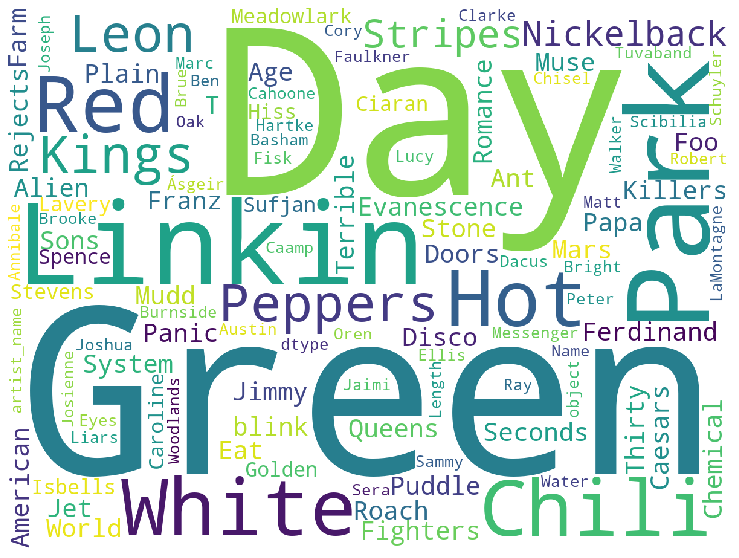

In [27]:
from wordcloud import WordCloud, STOPWORDS
text = (str(df['artist_name']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
top_artist=df.artist_name.value_counts().sort_values(ascending=False).nlargest(6)
top_artist=pd.DataFrame(top_artist)
top_artist.reset_index(inplace=True)

top_artist

index  artist_name
0     Lady Gaga           45
1    Kanye West           40
2         Drake           34
3        Eminem           23
4    Gucci Mane           20
5  David Guetta           20

In [29]:
df[df.artist_name == 'Green Day']

song_name artist_name  song_popularity  \
0             Boulevard of Broken Dreams   Green Day               73   
27                        American Idiot   Green Day               78   
931    Good Riddance (Time of Your Life)   Green Day               77   
943                   When I Come Around   Green Day               74   
1091                         Basket Case   Green Day               81   
1577      Wake Me Up When September Ends   Green Day               79   
14143                Welcome to Paradise   Green Day               67   
14841                          Bang Bang   Green Day                5   

       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0                262333      0.005520         0.496   0.682          0.000029   
27               176346      0.000026         0.380   0.988          0.000079   
931              153466      0.183000         0.475   0.432          0.000000   
943              178000      0.017500         0.531   0.909          0.000000   
1091             181533      0.002930         0.442   0.943          0.000009   
1577             285653      0.023000         0.546   0.814          0.000000   
14143            224133      0.000241         0.370   0.960          0.011600   
14841            205440      0.000359         0.503   0.984          0.000002   

       key  liveness  loudness  audio_mode  speechiness    tempo  \
0        8    0.0589    -4.095           1       0.0294  167.060   
27       1    0.3680    -2.042           1       0.0639  186.113   
931      7    0.1610    -7.844           1       0.0302   94.605   
943     11    0.2310    -4.236           1       0.0340   97.546   
1091     3    0.0910    -3.205           1       0.0602   85.064   
1577     7    0.0972    -5.146           1       0.0314  104.980   
14143    3    0.0563    -4.162           0       0.0378   89.428   
14841    9    0.4090    -1.650           1       0.1120  127.484   

       time_signature  audio_valence  
0                   4          0.474  
27                  4          0.769  
931                 4          0.648  
943                 4          0.814  
1091                4          0.781  
1577                4          0.146  
14143               4          0.717  
14841               4          0.368

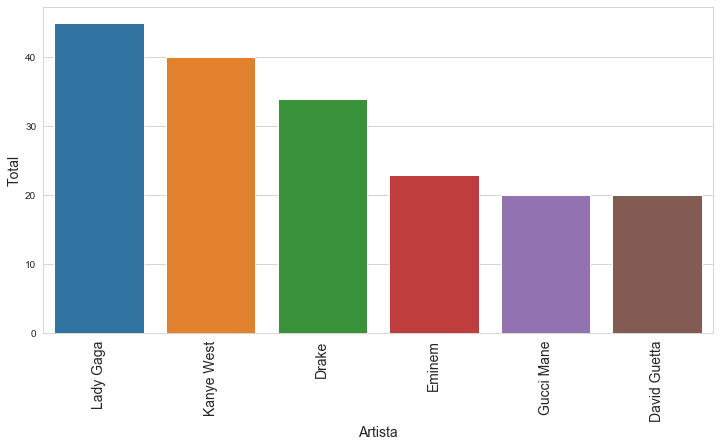

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x= 'index', y='artist_name', data=top_artist)
plt.ylabel('Total',fontsize=14)
plt.xlabel('Artista',fontsize=14)
plt.xticks(size=14,rotation=90);

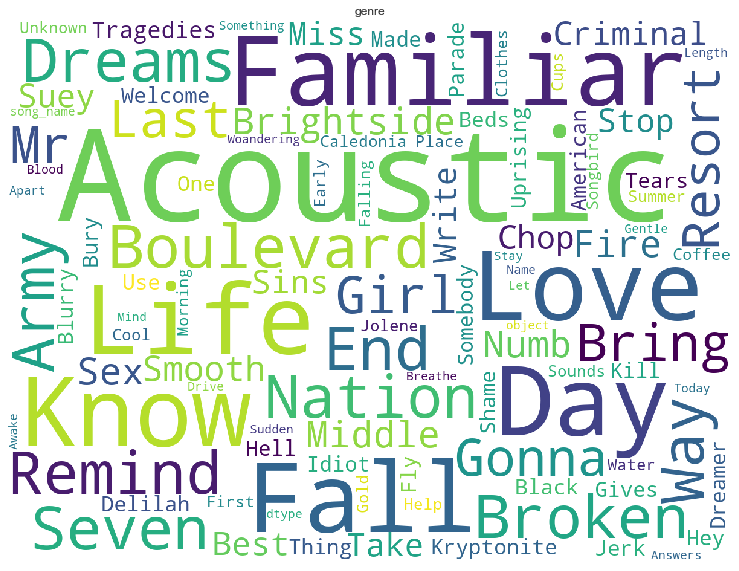

In [31]:
from wordcloud import WordCloud, STOPWORDS
text = (str(df['song_name']))
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=900).generate(text)
plt.imshow(wordcloud)
plt.title('genre')
plt.axis('off')
plt.show()


Filtrando só as 10 músicas mais populares. 
(na verdade, 11, pois como vou fazer a análise de sentimentos, uma das músicas está em espanhol - o que dificulta, dado que a biblioteca é para palavras em inglês)

In [194]:
df.drop([61], inplace=True)

In [195]:
top_pop=df.query('song_popularity == 100 | song_popularity >= 80')
top_pop=top_pop.sort_values(by='song_popularity', ascending=False).head(11)
top_pop


song_name    artist_name  song_popularity  \
4299                                 Happier     Marshmello              100   
1229                  I Love It (& Lil Pump)     Kanye West               99   
4302         Eastside (with Halsey & Khalid)   benny blanco               98   
4329               Promises (with Sam Smith)  Calvin Harris               98   
7576                              In My Mind         Dynoro               97   
1230                            Falling Down       Lil Peep               97   
1250                              SICKO MODE   Travis Scott               97   
1258  FEFE (feat. Nicki Minaj & Murda Beatz)        6ix9ine               96   
3460                                    SAD!   XXXTENTACION               96   
7590                               Moonlight   XXXTENTACION               96   
3286                              Be Alright     Dean Lewis               96   

      song_duration_ms  acousticness  danceability  energy  instrumentalness  \
4299            214289       0.19100         0.687   0.792          0.000000   
1229            127946       0.01140         0.901   0.522          0.000000   
4302            173799       0.55500         0.560   0.680          0.000000   
4329            213309       0.01190         0.781   0.768          0.000005   
7576            184560       0.17600         0.694   0.770          0.000011   
1230            196400       0.01750         0.669   0.574          0.002940   
1250            312820       0.00513         0.834   0.730          0.000000   
1258            179404       0.08800         0.931   0.387          0.000000   
3460            166605       0.25800         0.740   0.613          0.003720   
7590            135090       0.55600         0.921   0.537          0.004040   
3286            196373       0.69700         0.553   0.586          0.000000   

      key  liveness  loudness  audio_mode  speechiness    tempo  \
4299    5    0.1670    -2.749           1       0.0452  100.015   
1229    2    0.2590    -8.304           1       0.3300  104.053   
4302    6    0.1160    -7.648           0       0.3210   89.391   
4329   11    0.3250    -5.991           1       0.0394  123.070   
7576    6    0.1180    -5.335           1       0.1490  125.905   
1230    4    0.1460    -6.442           0       0.0286  120.013   
1250    8    0.1240    -3.714           1       0.2220  155.008   
1258    1    0.1360    -9.127           1       0.4120  125.978   
3460    8    0.1230    -4.880           1       0.1450   75.023   
7590    9    0.1020    -5.723           0       0.0804  128.009   
3286   11    0.0813    -6.319           1       0.0362  126.684   

      time_signature  audio_valence  class  
4299               4          0.671      0  
1229               4          0.329      0  
4302               4          0.319      0  
4329               4          0.486      0  
7576               4          0.163      0  
1230               4          0.273      0  
1250               4          0.446      0  
1258               4          0.376      0  
3460               4          0.473      0  
7590               4          0.711      0  
3286               4          0.443      0

Exportando para .csv para análise de sentimentos

In [197]:
song_lyrics=top_pop.sort_values(by='song_popularity', ascending=False).head(10)
song_lyrics=song_lyrics[['song_name', 'artist_name', 'song_popularity']]
song_lyrics

song_name    artist_name  song_popularity
4299                                 Happier     Marshmello              100
1229                  I Love It (& Lil Pump)     Kanye West               99
4302         Eastside (with Halsey & Khalid)   benny blanco               98
4329               Promises (with Sam Smith)  Calvin Harris               98
7576                              In My Mind         Dynoro               97
1230                            Falling Down       Lil Peep               97
1250                              SICKO MODE   Travis Scott               97
1258  FEFE (feat. Nicki Minaj & Murda Beatz)        6ix9ine               96
3460                                    SAD!   XXXTENTACION               96
7590                               Moonlight   XXXTENTACION               96

In [198]:
#gerando csv para análise de sentimentos
#song_lyrics.to_csv('song_lyrics_1.csv',index=False)

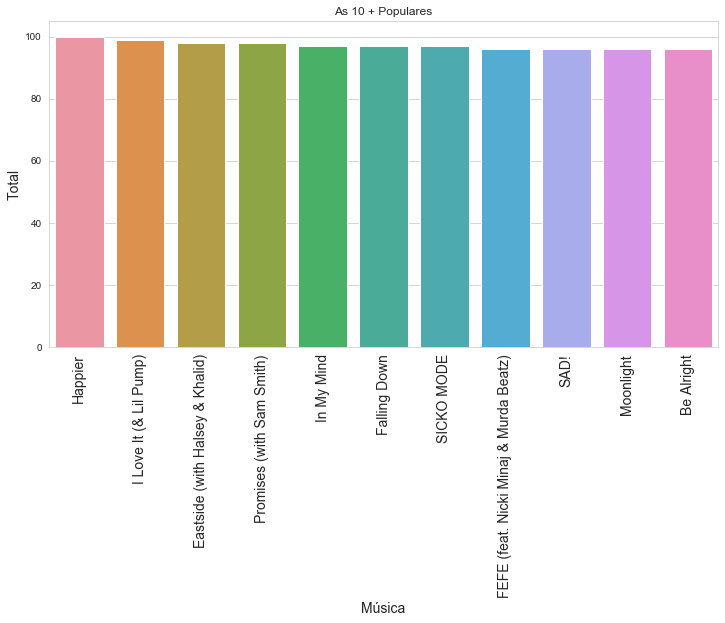

In [199]:
#plotar gráfico com o top 10 - song_popularity
plt.figure(figsize=(12,6))
sns.barplot(x= 'song_name', y='song_popularity', data=top_pop, orient='H')
plt.ylabel('Total',fontsize=14)
plt.xlabel('Música',fontsize=14)
plt.title('As 10 + Populares')
plt.xticks(size=14,rotation=90);

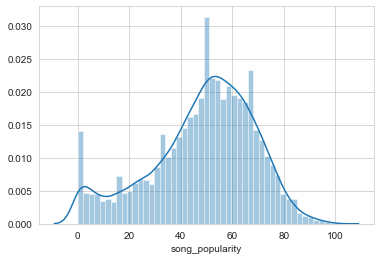

In [36]:
sns.distplot(df['song_popularity']);

In [372]:
#df.danceability.sort_values(ascending=False)

In [37]:
#top10 danceability


top_danceability=df.query('danceability == 1 | danceability >= 0.965')
top_danceability=top_danceability.sort_values(by='danceability', ascending=False).head(10)
top_danceability


song_name        artist_name  song_popularity  \
4399                           Walk Away          Ms Krazie               36   
11859                          HOLLYWOOD                BIA               52   
2403                        Ice Ice Baby        Vanilla Ice               66   
7982                        Funky Friday               Dave               81   
9283                           Make Love         Gucci Mane               56   
9438                     Gronlandic Edit        of Montreal               61   
17014  We Outta Here! (feat. Young Nudy)         Lil Yachty                0   
12499                 Drip (feat. Migos)            Cardi B               52   
12749              Now (feat. 21 Savage)         Young Thug               69   
139                             SexyBack  Justin Timberlake               77   

       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
4399             278653      0.003170         0.987   0.358          0.046400   
11859            213311      0.050000         0.981   0.504          0.000000   
2403             271466      0.027000         0.980   0.535          0.000002   
7982             182741      0.078300         0.975   0.535          0.000000   
9283             300160      0.005280         0.972   0.563          0.002570   
9438             204760      0.083300         0.971   0.400          0.000661   
17014            232320      0.007150         0.970   0.306          0.000108   
12499            262308      0.053500         0.969   0.590          0.000000   
12749            206773      0.000209         0.968   0.353          0.000002   
139              242733      0.058400         0.967   0.583          0.000000   

       key  liveness  loudness  audio_mode  speechiness    tempo  \
4399     9    0.0943    -8.678           0       0.0880  117.978   
11859    6    0.1280    -8.133           1       0.0856  125.990   
2403     2    0.1040   -16.035           1       0.0580  115.744   
7982     1    0.1070    -7.227           1       0.1960  125.066   
9283    11    0.1110    -6.983           1       0.1560  129.984   
9438     4    0.1080    -7.154           0       0.0487  119.953   
17014    1    0.1170    -5.732           1       0.3250  125.011   
12499   11    0.0776    -7.826           1       0.2510  129.997   
12749    6    0.0940    -7.422           1       0.3310  130.016   
139      7    0.0519    -5.562           0       0.0789  117.000   

       time_signature  audio_valence  
4399                4         0.5530  
11859               4         0.8110  
2403                4         0.6750  
7982                4         0.6710  
9283                4         0.2170  
9438                4         0.6520  
17014               4         0.2080  
12499               4         0.2820  
12749               4         0.0971  
139                 4         0.9640

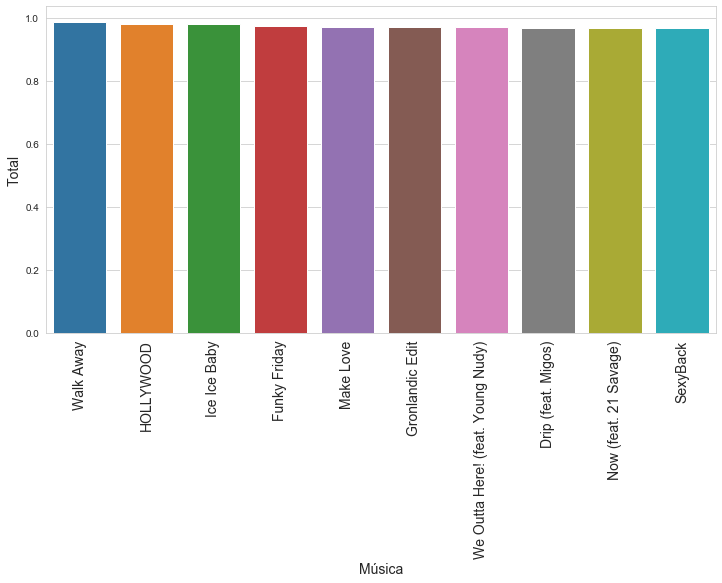

In [379]:
plt.figure(figsize=(12,6))
sns.barplot(x= 'song_name', y='danceability', data=top_danceability)
plt.ylabel('Total',fontsize=14)
plt.xlabel('Música',fontsize=14)
plt.xticks(size=14,rotation=90);

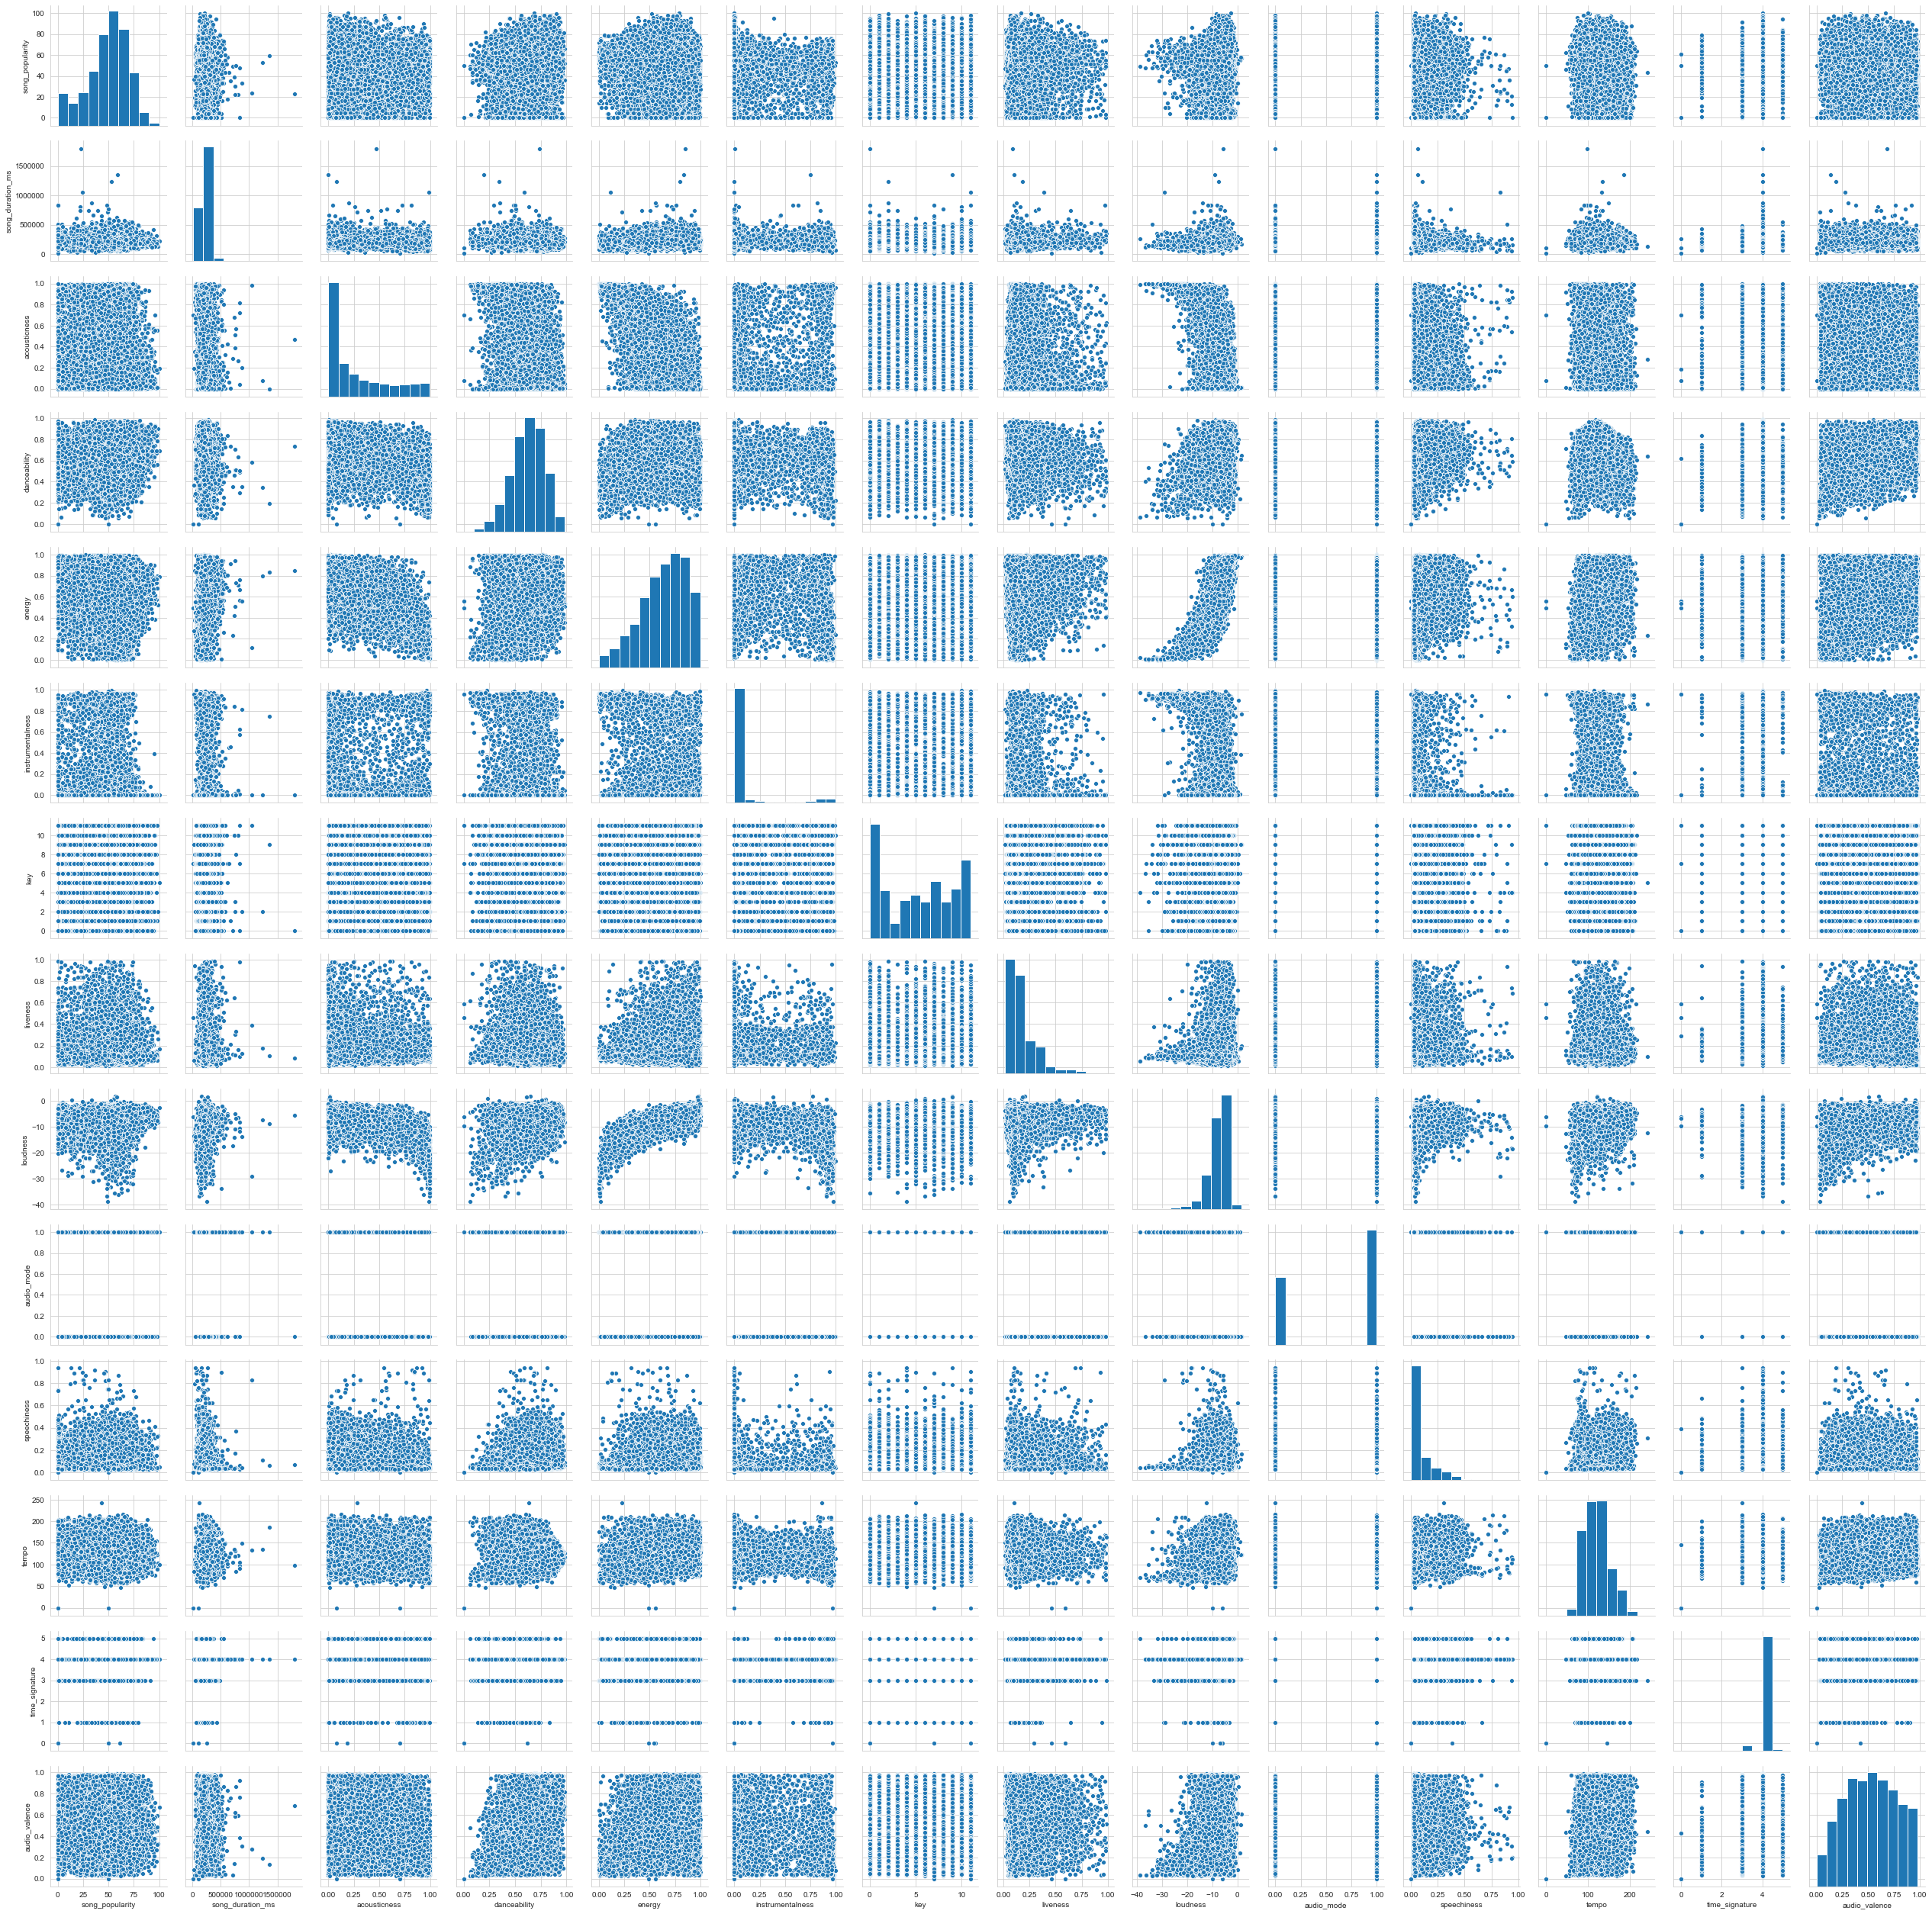

In [35]:
sns.pairplot(df);

In [38]:
cat=["key","audio_mode","time_signature"]
param=["song_duration_ms","acousticness","danceability","energy","instrumentalness","liveness","loudness","speechiness","tempo","audio_valence"]

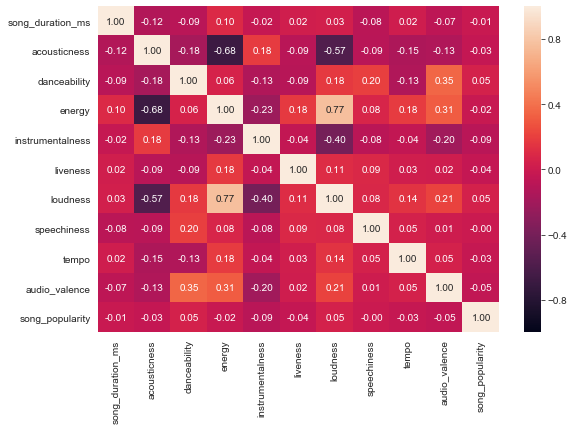

In [39]:
#correlação entre as variáveis numéricas x song popularity
plt.figure(figsize=(9, 6))
ax=sns.heatmap(
    pd.concat([df[param],df["song_popularity"]],axis=1).corr(),
    vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.show();

O mapa de calor mostra que as variáveis, em geral, são independentes, exceto pela forte correlação entre loudness e energy e uma correlação negativa entre energy e acousticness. E que a correlação entre song_popularity com as demais variáveis, é muito baixa.

In [40]:
df.to_csv('df_predictions.csv')

<Figure size 648x432 with 0 Axes>

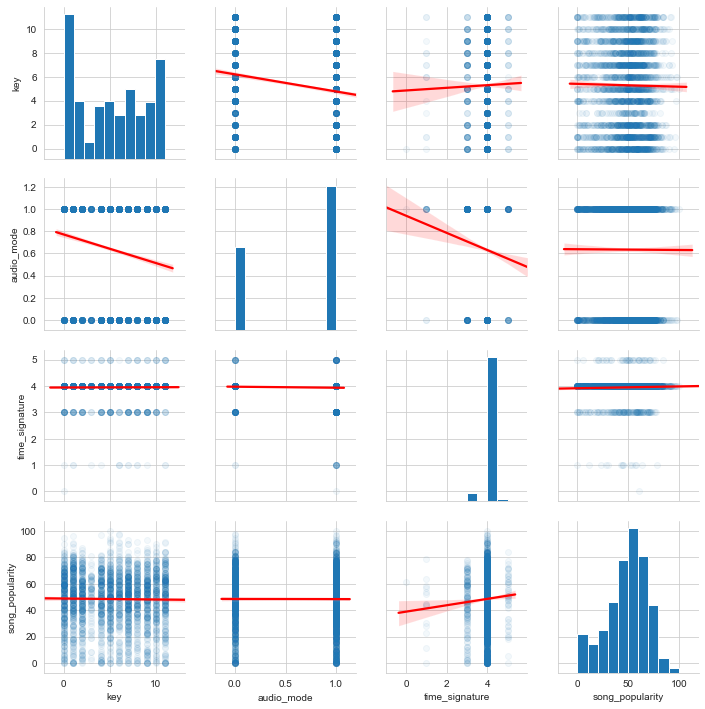

In [41]:
#variáveis categoricas x song_popularity
plt.figure(figsize=(9, 6))
g = sns.pairplot(
    pd.concat([df[cat],df["song_popularity"]],axis=1).sample(n=3000),
    kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}}
);

In [42]:
df['song_popularity'].value_counts()

52     345
58     335
55     333
51     316
53     314
54     314
50     313
49     305
60     300
56     298
48     291
63     287
59     285
61     283
62     280
65     276
47     276
64     274
57     263
66     255
46     252
45     245
43     244
44     237
0      231
69     226
42     222
68     221
67     219
41     210
      ... 
18      67
3       63
80      61
17      60
6       59
11      57
12      55
9       51
10      51
14      51
13      48
83      46
82      45
84      44
87      28
85      23
86      20
90      18
88      17
89      16
91      13
93       9
94       9
92       8
95       6
96       5
97       3
98       3
99       1
100      1
Name: song_popularity, Length: 101, dtype: int64

In [43]:
df[df['song_popularity'] >=70]

song_name  \
0                             Boulevard of Broken Dreams   
2                                      Seven Nation Army   
3                                             By The Way   
5                                       Bring Me To Life   
6                                            Last Resort   
7                               Are You Gonna Be My Girl   
8                                         Mr. Brightside   
9                                            Sex on Fire   
10                                            The Middle   
12                                       Smooth Criminal   
13                                            Can't Stop   
15                                           Take Me Out   
16                                            I Miss You   
18                            I Write Sins Not Tragedies   
19                                            Kryptonite   
21                                          Use Somebody   
24                                              Uprising   
25                                     Hey There Delilah   
27                                        American Idiot   
28                           Welcome to the Black Parade   
29                                        Gives You Hell   
31                                          Like a Stone   
33                           I Hate Everything About You   
34                            Rollin' (Air Raid Vehicle)   
35                                               Fat Lip   
37                                                Savior   
38                                                Bodies   
39                                Sugar, We're Goin Down   
40                                             Last Nite   
43                                Down With the Sickness   
...                                                  ...   
18286                                            Hi Bich   
18304  Love Me Like You Do - From "Fifty Shades Of Grey"   
18308                                    Ain't Your Mama   
18328                                               Roar   
18334                                               Boys   
18336                                          Cool Kids   
18358                                            Foolish   
18377                         Quit (feat. Ariana Grande)   
18379                                         No Vacancy   
18383                                       Sunset Lover   
18391                                         Solo Dance   
18404                                            History   
18491                                             Motiv8   
18492                                         Rake It Up   
18497                                            She Bad   
18500                                        Fight Night   
18523                            We Don't Luv Em (Remix)   
18525                                       NBAYOUNGBOAT   
18526             From The D To The A (feat. Lil Yachty)   
18527                                            Lockjaw   
18533                                              Bands   
18543                               You're Somebody Else   
18559                                 The Only Exception   
18707                                               Holy   
18719                                               3:15   
18742                                    Portland, Maine   
18747                                               Arms   
18753                                       Recording 15   
18774                                              River   
18813                               First Day Of My Life   

                    artist_name  song_popularity  song_duration_ms  \
0                     Green Day               73            262333   
2             The White Stripes               76            231733   
3         Red Hot Chili Peppers               74            216933   
5                   Evanescence               

In [44]:
df[df['song_popularity'] <=20]

song_name  \
22                                          No One Knows   
30                                           All My Life   
36                                         The Pretender   
121                                      Beautiful Girls   
210                                           El Matador   
225                                              Querida   
234                                         Besame Mucho   
237                                            Chan Chan   
282                                    Hit the Road Jack   
331                                            I'm A Man   
338                Psychotic Reaction - Rarities Version   
346     I'm Waiting For The Man - Album Version (Stereo)   
363                             Wildflowers - Remastered   
521                                        Nobody's Fool   
539         Here I Go Again 87 - 2007 Remastered Version   
543                                                 Jump   
544                                       Rock the Night   
546                              Working for the Weekend   
559                                Addicted To That Rush   
561                                  I Wanna Be Somebody   
563                                    Over The Mountain   
565            Armed And Ready - 2008 Remastered Version   
638                                     Careless Whisper   
642                                               Heaven   
701                                   Stand - Remastered   
715                                        Jessie's Girl   
789                                         In Your Eyes   
816                           We Belong - Single Version   
864                                           U.N.I.T.Y.   
912    I'll Be There For You/You're All I Need To Get By   
...                                                  ...   
18420                              Love Gun - Radio Edit   
18427                                             Mirage   
18429                                       Fall in Deep   
18430                                         Plot Twist   
18437                                         Old School   
18438                                              Light   
18442                                      Light Outside   
18444                        Lovesick (feat. Felix Snow)   
18453                                        Sing to You   
18516                                              Booty   
18534                                               Rock   
18535                                   I Won't Fight It   
18538                                        Bloodstream   
18544                                             Cherry   
18549                                               1435   
18550                                  Wait by the River   
18551                                         Many Lives   
18563                                    Trembling hands   
18566                                            Details   
18571                                          The Enemy   
18585                                        Dark Matter   
18588                                            Darlin'   
18593                                              Float   
18597                                           Decorate   
18602                                             Pieces   
18604                                        Missing You   
18612                                          Let Me In   
18617                                           Crystals   
18624                               Flowers In Your Hair   
18632                             You & Me - Flume Remix   

                   artist_name  song_popularity  song_duration_ms  \
22     Queens of the Stone Age               13            255066   
30                Foo Fighters               11            262733   
36                Foo Fighters               11            269373   
121              Sean Kingston               10   

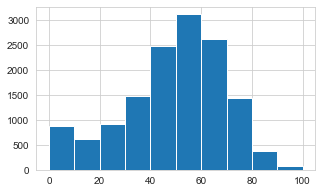

In [45]:
plt.figure(figsize=(5, 3))
df["song_popularity"].hist();

A maioria das músicas estão em uma posição mediana.

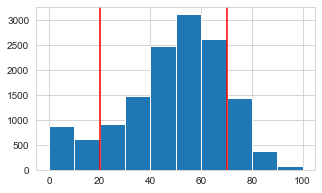

In [46]:
#cortando a base entre os top e bottom pra saber o que influencia no sucesso da música
plt.figure(figsize=(5, 3))
df["song_popularity"].hist()
plt.axvline(x=20,color="red")
plt.axvline(x=70,color="red");

Para tentar entender os fatores que influenciam no sucesso de uma música, classifiquei as músicas entre 'top' e 'bottom'. 
Top : song_popularity >=70 
Bottom: song_popularity <=20

In [47]:
df_cut=df.loc[(df["song_popularity"]>=70) | (df["song_popularity"]<=20)].reset_index(drop="index")

In [48]:
df_cut["position"] = df_cut["song_popularity"].apply(lambda x : "top" if x >=70 else "bottom")


In [49]:
len(df_cut)

3453

O dataframe 'recortado' ficou com 3453 músicas

<Figure size 648x432 with 0 Axes>

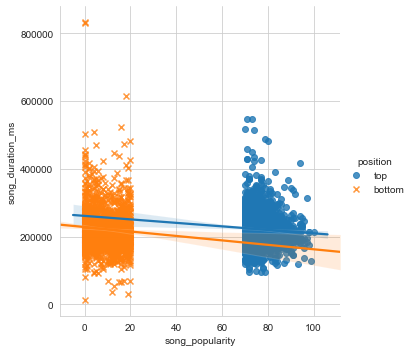

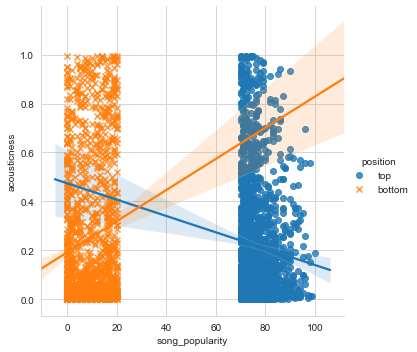

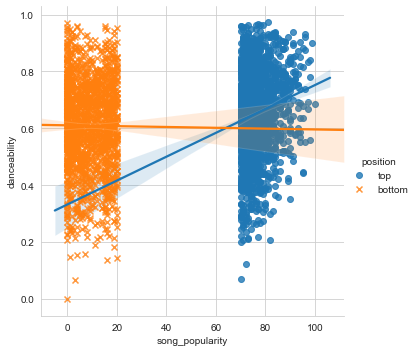

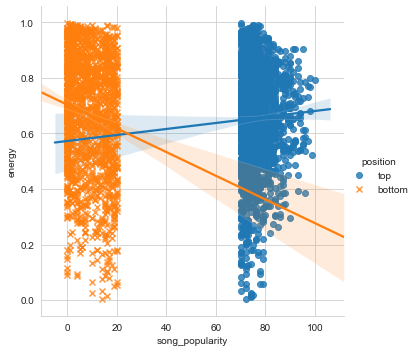

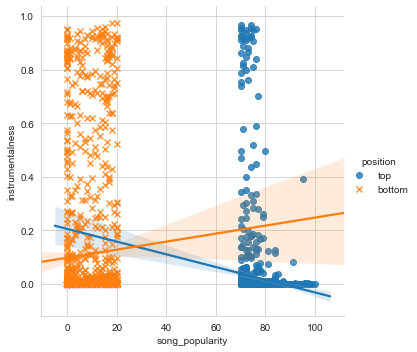

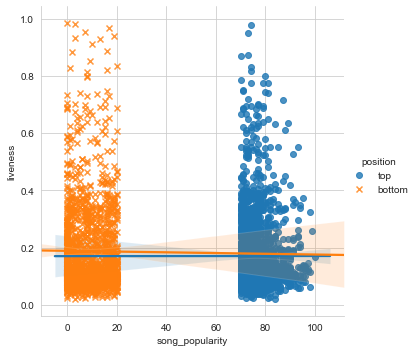

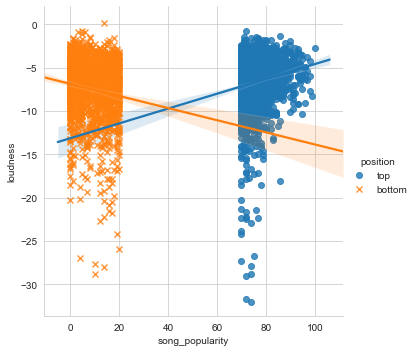

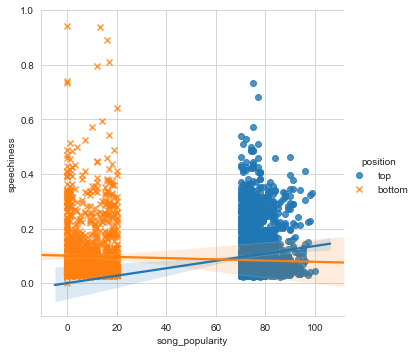

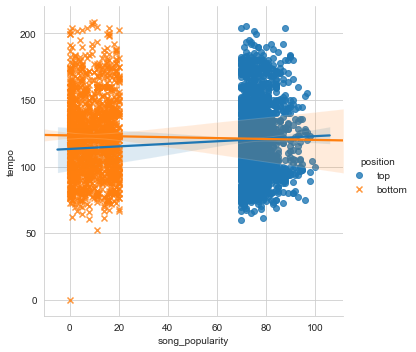

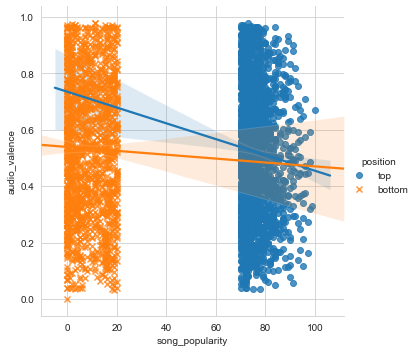

In [50]:
#Scatter plot com regressão entre as duas categorias para diversas variáveis 

plt.figure(figsize=(9, 6))
for feature in param:
  #sns.factorplot(data=df_data_versus,x="song_popularity",y=feature,hue="top",kind="strip")
  sns.lmplot(data=df_cut,x="song_popularity",y=feature,hue="position",fit_reg=True, markers=["o", "x"]);
  
  #sns.(data=df_data_versus,x="song_popularity",y=feature,hue="top")

In [51]:
#cat param

df_dummies = pd.get_dummies(df_cut, columns=cat, drop_first=True)
df_dummies.head()

song_name            artist_name  song_popularity  \
0  Boulevard of Broken Dreams              Green Day               73   
1           Seven Nation Army      The White Stripes               76   
2                  By The Way  Red Hot Chili Peppers               74   
3            Bring Me To Life            Evanescence               80   
4                 Last Resort             Papa Roach               81   

   song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0            262333      0.005520         0.496   0.682          0.000029   
1            231733      0.008170         0.737   0.463          0.447000   
2            216933      0.026400         0.451   0.970          0.003550   
3            235893      0.008950         0.316   0.945          0.000002   
4            199893      0.000504         0.581   0.887          0.001110   

   liveness  loudness  ...  key_7  key_8  key_9 key_10  key_11  audio_mode_1  \
0    0.0589    -4.095  ...      0      1      0      0       0             1   
1    0.2550    -7.828  ...      0      0      0      0       0             1   
2    0.1020    -4.938  ...      0      0      0      0       0             1   
3    0.3960    -3.169  ...      0      0      0      0       0             0   
4    0.2680    -3.659  ...      0      0      0      0       0             0   

   time_signature_1  time_signature_3  time_signature_4  time_signature_5  
0                 0                 0                 1                 0  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 0                 1                 0  
4                 0                 0                 1                 0  

[5 rows x 30 columns]

In [52]:
df_dummies2 = pd.get_dummies(df, columns=cat, drop_first=True)
df_dummies2.head()

song_name            artist_name  song_popularity  \
0  Boulevard of Broken Dreams              Green Day               73   
1                  In The End            Linkin Park               66   
2           Seven Nation Army      The White Stripes               76   
3                  By The Way  Red Hot Chili Peppers               74   
4           How You Remind Me             Nickelback               56   

   song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0            262333      0.005520         0.496   0.682          0.000029   
1            216933      0.010300         0.542   0.853          0.000000   
2            231733      0.008170         0.737   0.463          0.447000   
3            216933      0.026400         0.451   0.970          0.003550   
4            223826      0.000954         0.447   0.766          0.000000   

   liveness  loudness  ...  key_7  key_8  key_9  key_10  key_11  audio_mode_1  \
0    0.0589    -4.095  ...      0      1      0       0       0             1   
1    0.1080    -6.407  ...      0      0      0       0       0             0   
2    0.2550    -7.828  ...      0      0      0       0       0             1   
3    0.1020    -4.938  ...      0      0      0       0       0             1   
4    0.1130    -5.065  ...      0      0      0       1       0             1   

   time_signature_1  time_signature_3  time_signature_4  time_signature_5  
0                 0                 0                 1                 0  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 0                 1                 0  
4                 0                 0                 1                 0  

[5 rows x 29 columns]

In [53]:
df_dummies.columns

Index(['song_name', 'artist_name', 'song_popularity', 'song_duration_ms',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence',
       'position', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'audio_mode_1',
       'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')

In [96]:
#df_cut
X = df_dummies[['song_duration_ms','acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'audio_mode_1',
       'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5']]
y = df_dummies['song_popularity']

In [85]:
#df 
X = df_dummies2[['song_duration_ms','acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'audio_mode_1',
       'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5']]
y = df_dummies2['song_popularity']

### 'Splitando' a base

In [97]:
from sklearn.model_selection import train_test_split


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=302)

### Treinando o modelo de Regressão Linear

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lm = LinearRegression()

In [101]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
#df_cut
r2_train = lm.score(X_train, y_train)
r2_test = lm.score(X_test, y_test) #lm.score > calculo r2
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.11
R2 no set de teste: 0.06


In [77]:
#df
r2_train = lm.score(X_train, y_train)
r2_test = lm.score(X_test, y_test) #lm.score > calculo r2
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.02
R2 no set de teste: 0.02


Predições do modelo:

In [103]:
#df_cut
predictions = lm.predict(X_test)

In [104]:
#df_cut
predic_reglin = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
predic_reglin.head()

Actual  Predicted
833       87  46.694021
1105      84  56.268514
2936       2  39.548505
1516      74  43.437720
98        76  51.479663

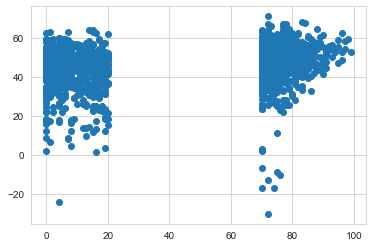

In [105]:
#df_cut
plt.scatter(y_test,predictions)

In [91]:
#df
r2_train = lm.score(X_train, y_train)
r2_test = lm.score(X_test, y_test) #lm.score > calculo r2
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.02
R2 no set de teste: 0.02


In [92]:
#df
predictions = lm.predict(X_test)

In [93]:
#df
predic_reglin = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
predic_reglin.head()

Actual  Predicted
9234       58  50.496751
10476      47  43.375504
4594       72  51.802613
9748       62  49.063990
4245       73  47.012293

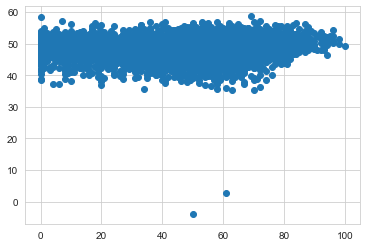

In [94]:
#df
plt.scatter(y_test,predictions)

In [106]:
from sklearn import metrics

In [107]:
#df_cut
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 31.08622682943052
MSE: 1109.2419604462132
RMSE: 33.30528427211233


In [95]:
#df
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 15.922417706541063
MSE: 405.0582893108482
RMSE: 20.12605995496506


### Padronizando os dados:

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
df_cut.columns

Index(['song_name', 'artist_name', 'song_popularity', 'song_duration_ms',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo',
       'time_signature', 'audio_valence', 'position'],
      dtype='object')

In [110]:
scaler = StandardScaler()

In [111]:
scaler.fit(df_cut.drop(['song_name', 'artist_name', 'song_popularity', 'position'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [112]:
scaled_features = scaler.transform(df_cut.drop(['song_name', 'artist_name', 'song_popularity', 'position'],axis=1))

In [113]:
feat_columns=['song_duration_ms','acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
              'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo','time_signature', 'audio_valence']

In [114]:
cut_columns = df_cut[['song_name', 'artist_name', 'song_popularity', 'position']]


In [115]:
df_feat = pd.DataFrame(scaled_features, columns=feat_columns)
df_feat.head()

song_duration_ms  acousticness  danceability    energy  instrumentalness  \
0          0.714481     -0.830226     -0.880767  0.107799         -0.320159   
1          0.173823     -0.820504      0.666124 -0.973247          1.926382   
2         -0.087673     -0.753626     -1.169605  1.529449         -0.302464   
3          0.247324     -0.817643     -2.036121  1.406042         -0.320298   
4         -0.388745     -0.848627     -0.335183  1.119737         -0.314728   

        key  liveness  loudness  audio_mode  speechiness     tempo  \
0  0.758751 -0.833945  0.846573    0.783295    -0.704184  1.592119   
1 -1.448699  0.536667 -0.240438    0.783295    -0.218446  0.074673   
2 -1.448699 -0.532704  0.601100    0.783295     0.052709  0.024172   
3 -0.344974  1.522165  1.116215   -1.276658     0.218523  2.395878   
4 -0.344974  0.627528  0.973532   -1.276658    -0.382309 -1.095699   

   time_signature  audio_valence  
0        0.133341      -0.220707  
1        0.133341      -0.850373  
2        0.133341      -1.379293  
3        0.133341      -0.867164  
4        0.133341       0.828736

In [116]:
df_standard = pd.concat([cut_columns, df_feat], axis=1)
df_standard.head(1)

song_name artist_name  song_popularity position  \
0  Boulevard of Broken Dreams   Green Day               73      top   

   song_duration_ms  acousticness  danceability    energy  instrumentalness  \
0          0.714481     -0.830226     -0.880767  0.107799         -0.320159   

        key  liveness  loudness  audio_mode  speechiness     tempo  \
0  0.758751 -0.833945  0.846573    0.783295    -0.704184  1.592119   

   time_signature  audio_valence  
0        0.133341      -0.220707

In [117]:
df_standard.columns

Index(['song_name', 'artist_name', 'song_popularity', 'position',
       'song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence'],
      dtype='object')

In [118]:
X = df_standard[['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']]
y = df_standard['song_popularity']

In [119]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=320)

XGBoost

In [124]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [125]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [126]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [127]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "df_cut")

Accuracy: 5.41% df_cut


Os modelos criados para predizerem as características que influenciam na popularidade de uma música apresentaram métricas muito
baixas, explicando pouco a nossa variável.

### Classificação 01 - multinomial



In [128]:
df.columns

Index(['song_name', 'artist_name', 'song_popularity', 'song_duration_ms',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo',
       'time_signature', 'audio_valence'],
      dtype='object')

In [129]:
df.song_popularity.unique()

array([ 73,  66,  76,  74,  56,  80,  81,  78,  63,  75,  69,  77,  71,
        62,  79,  13,  28,  11,  65,  70,  60,  72,  57,  64,  61,  67,
        94,  98,  59,  87,  85,  58,  92,  83,  44,  47,  54,  49,  52,
        95,  45,  38,  46,  53,  39,  88,  68,  37,  43,  84,  40,  41,
        10,  31,  48,  24,  29,  51,   4,   7,  50,  42,  30,  21,  55,
        14,  33,   8,  16,  34,  26,  15,  19,   5,   3,  22,  36,  32,
        35,   9,  82,  25,  86,  12,  18,  27,  17,   6,  20,   0,  90,
        93,  91,  89,  99,  97,  96,   1,   2,  23, 100], dtype=int64)

In [130]:
df['class'] = df['song_popularity'].apply(lambda x: 0 if x >=80 else (1 if x<= 79 and x>=20 else 2
                                                                     ))

In [131]:
df.head(2)


song_name  artist_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams    Green Day               73            262333   
1                  In The End  Linkin Park               66            216933   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0       0.00552         0.496   0.682          0.000029    8    0.0589   
1       0.01030         0.542   0.853          0.000000    3    0.1080   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  167.060               4          0.474   
1    -6.407           0       0.0498  105.256               4          0.370   

   class  
0      1  
1      1

In [132]:
X2 = df[['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']]
y2 = df['class']

In [133]:
df_2=df

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=320)

Regressão Logística

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
logmodel = LogisticRegression(solver='lbfgs', multi_class='multinomial')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
y_pred = logmodel.predict(X_test)


In [138]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.851891506067095

In [139]:
b_accuracy = balanced_accuracy_score(y_test, y_pred)
b_accuracy

0.3333333333333333

In [140]:
print(confusion_matrix(y_test,y_pred))

[[   0   90    0]
 [   0 2387    0]
 [   0  325    0]]


A acurácia do modelo está boa, mas o modelo está desbalanceado.

In [167]:
#print(classification_report(y_test,y_pred))

In [143]:
np.unique(y_pred)

array([1], dtype=int64)

In [145]:
cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
cnf_matrix

0     1  2
0  0    90  0
1  0  2387  0
2  0   325  0

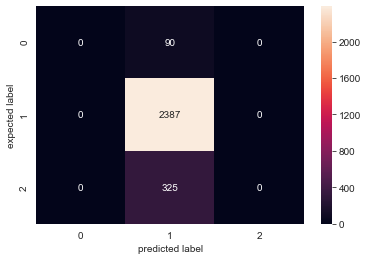

In [146]:
plt.figure()
sns.heatmap(cnf_matrix, annot=True, fmt='.0f')
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

### Classificação 02 - binomial

In [147]:
df['class'] = df['song_popularity'].apply(lambda x: 0 if x >=70 else 1)

In [148]:
df['class'].value_counts()

1    12124
0     1882
Name: class, dtype: int64

In [149]:
X2 = df[['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']]
y2 = df['class']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=320)

In [151]:
from sklearn.linear_model import LogisticRegression

In [152]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
y_pred = logmodel.predict(X_test)


In [154]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8611705924339758

In [155]:
b_accuracy = balanced_accuracy_score(y_test, y_pred)
b_accuracy

0.5

In [156]:
print(confusion_matrix(y_test,y_pred))

[[   0  389]
 [   0 2413]]


In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       389
           1       0.86      1.00      0.93      2413

    accuracy                           0.86      2802
   macro avg       0.43      0.50      0.46      2802
weighted avg       0.74      0.86      0.80      2802



### 2 - classificando proporcionalmente


In [165]:
df2 = df

In [166]:
df2.drop('class', axis=1, inplace=True)

In [167]:
df['song_popularity'].value_counts().sort_values(ascending=False)

52     345
58     335
55     333
51     316
53     314
54     314
50     313
49     305
60     300
56     298
48     291
63     287
59     285
61     283
62     280
65     276
47     276
64     274
57     263
66     255
46     252
45     245
43     244
44     237
0      231
69     226
42     222
68     221
67     219
41     210
      ... 
18      67
3       63
80      61
17      60
6       59
11      57
12      55
9       51
10      51
14      51
13      48
83      46
82      45
84      44
87      28
85      23
86      20
90      18
88      17
89      16
91      13
93       9
94       9
92       8
95       6
96       5
98       3
97       3
99       1
100      1
Name: song_popularity, Length: 101, dtype: int64

In [168]:
df2['song_popularity'].describe()

count    14006.000000
mean        48.528773
std         20.169195
min          0.000000
25%         37.000000
50%         51.000000
75%         63.000000
max        100.000000
Name: song_popularity, dtype: float64

In [169]:
df2['class'] = df2['song_popularity'].apply(lambda x: 0 if x >=60 else (1 if x<= 51 and x>=30 else 2))

In [170]:
df2['class'].value_counts()

2    4900
1    4603
0    4503
Name: class, dtype: int64

In [171]:
X2 = df2[['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']]
y2 = df2['class']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=320)

XGBoost

In [173]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [174]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [175]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 40.04%


In [176]:
print(confusion_matrix(y_test,y_pred))

[[501 147 250]
 [327 285 313]
 [366 277 336]]


Multinominal

In [177]:
logmodel = LogisticRegression(solver='lbfgs', multi_class='multinomial')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
y_pred = logmodel.predict(X_test)


In [179]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.34939329050678086

In [180]:
b_accuracy = balanced_accuracy_score(y_test, y_pred)
b_accuracy

0.3333333333333333

In [181]:
print(confusion_matrix(y_test,y_pred))

[[  0   0 898]
 [  0   0 925]
 [  0   0 979]]


In [182]:
cnf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
cnf_matrix

0  1    2
0  0  0  898
1  0  0  925
2  0  0  979

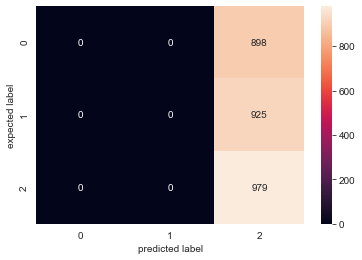

In [183]:
plt.figure()
sns.heatmap(cnf_matrix, annot=True, fmt='.0f')
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

Random Forest

In [185]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_test)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))


Accuracy: 0.39364739471805854


In [ ]:
A conclusão é que os atributos das músicas no dataset não são suficientes para predizerem a popularidade da música.